In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/U_M1P8G/Desktop/IDE/Доп. главы высшей математики/Кластеризация и техники понижения размерности/data/snsdata.csv")

In [2]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df.drop(columns=['gradyear', 'gender', 'age', 'friends'], inplace=True)

In [9]:
df.shape
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [14]:
df_scaled[0][0]

np.float64(-0.3322172643985876)

Реализуем на нормализованных признаках алгоритм K-means

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df_scaled)
kmeans.inertia_

856276.696246784

In [46]:
labels = kmeans.labels_

import numpy as np
unique, counts = np.unique(labels, return_counts=True)

cluster_counts = dict(zip(unique, counts))
print("\nВ виде словаря:", cluster_counts)



В виде словаря: {np.int32(0): np.int64(2201), np.int32(1): np.int64(19599), np.int32(2): np.int64(4284), np.int32(3): np.int64(902), np.int32(4): np.int64(941), np.int32(5): np.int64(851), np.int32(6): np.int64(1), np.int32(7): np.int64(467), np.int32(8): np.int64(754)}


In [47]:
unique_person_idx = np.where(labels == 6)[0][0]
print(f"Индекс уникального человека в данных: {unique_person_idx}")

# Находим самого человека в исходной таблице
unique_person = df.iloc[unique_person_idx]
print(f"\nУникальный подросток (строка {unique_person_idx}):")
print(unique_person)

Индекс уникального человека в данных: 14187

Уникальный подросток (строка 14187):
basketball        0
football          2
soccer            0
softball          0
volleyball        0
swimming          1
cheerleading      0
baseball          0
tennis            0
sports            0
cute              1
sex              22
sexy              1
hot               0
kissed            0
dance             1
band              1
marching          0
music             0
rock              1
god              10
church            0
jesus             1
bible             0
hair             12
dress             2
blonde          327
mall              0
shopping          0
clothes           1
hollister         0
abercrombie       0
die               6
death             6
drunk             6
drugs             0
cluster_em        1
Name: 14187, dtype: int64


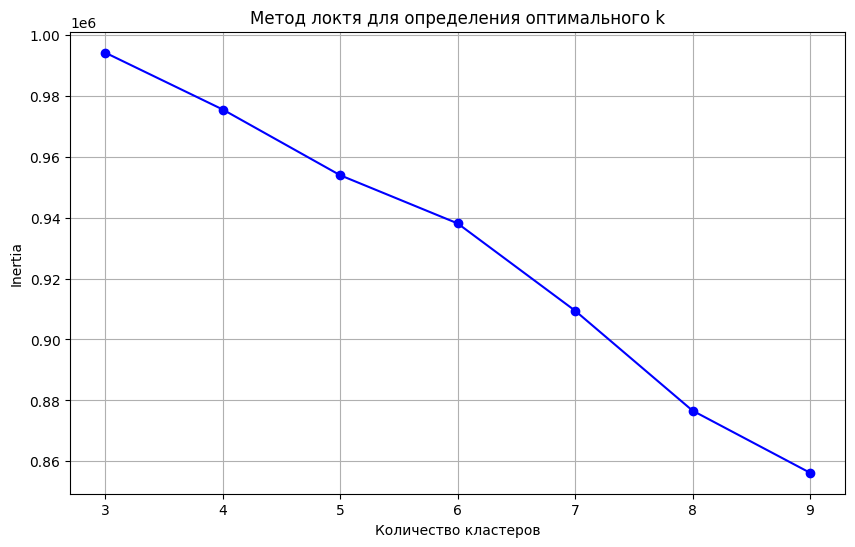

In [24]:
inertia_list = []
k_range = range (3, 10)
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)
    
# Для визуализации метода локтя

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_list, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True)
plt.show()   

k = 3: Silhouette Score = 0.325
k = 4: Silhouette Score = 0.311
k = 5: Silhouette Score = 0.306
k = 6: Silhouette Score = 0.212
k = 7: Silhouette Score = 0.260
k = 8: Silhouette Score = 0.269
k = 9: Silhouette Score = 0.252


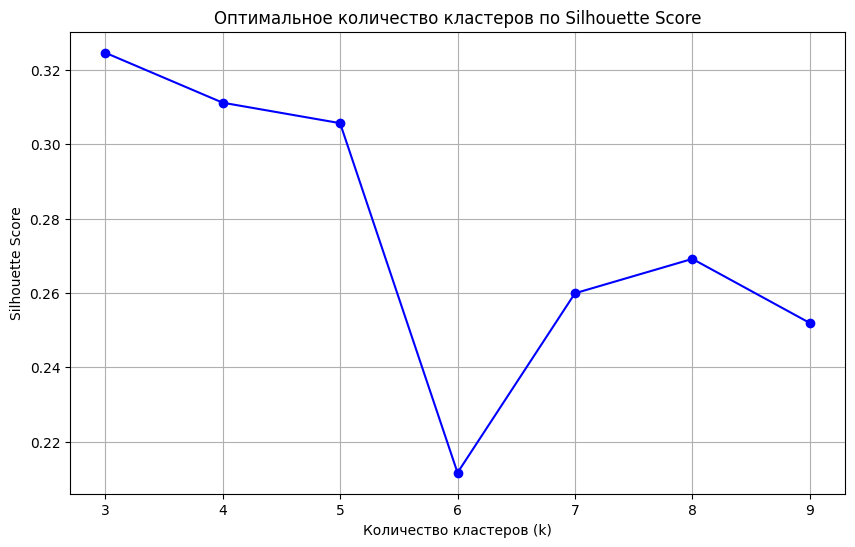

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


silhouette_scores = []
k_range = range(3, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k}: Silhouette Score = {score:.3f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Оптимальное количество кластеров по Silhouette Score')
plt.grid(True)
plt.show()

Реализуем сегментацию на k=3

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

labels = kmeans.labels_

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("\nВ виде словаря:", cluster_counts)


В виде словаря: {np.int32(0): np.int64(22900), np.int32(1): np.int64(1134), np.int32(2): np.int64(5966)}


In [32]:
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)  # используем исходные названия столбцов
df_scaled_df['cluster'] = labels

print("Масштабированные данные с кластерами:")
print(df_scaled_df.head())

Масштабированные данные с кластерами:
   basketball  football    soccer  softball  volleyball  swimming  \
0   -0.332217 -0.357697 -0.242874 -0.217928    -0.22367 -0.259971   
1   -0.332217  1.060049 -0.242874 -0.217928    -0.22367 -0.259971   
2   -0.332217  1.060049 -0.242874 -0.217928    -0.22367 -0.259971   
3   -0.332217 -0.357697 -0.242874 -0.217928    -0.22367 -0.259971   
4   -0.332217 -0.357697 -0.242874 -0.217928    -0.22367 -0.259971   

   cheerleading  baseball    tennis    sports  ...      mall  shopping  \
0     -0.207327 -0.201131 -0.168939 -0.297123  ... -0.369915 -0.487314   
1     -0.207327 -0.201131 -0.168939 -0.297123  ...  1.067392 -0.487314   
2     -0.207327 -0.201131 -0.168939 -0.297123  ... -0.369915 -0.487314   
3     -0.207327 -0.201131 -0.168939 -0.297123  ... -0.369915 -0.487314   
4     -0.207327 -0.201131 -0.168939 -0.297123  ... -0.369915  2.273673   

    clothes  hollister  abercrombie       die     death     drunk     drugs  \
0 -0.314198  -0.201476 

In [39]:
df_gr = df.groupby(labels).mean()
df_gr

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.148865,0.149345,0.150830,0.085328,0.073231,0.084541,0.048428,0.058777,0.063974,0.086288,...,0.044148,0.130699,0.190568,0.061528,0.017598,0.010830,0.127686,0.080611,0.053362,0.022096
1,0.557319,0.522928,0.341270,0.282187,0.206349,0.270723,0.208995,0.248677,0.142857,0.529101,...,0.792769,0.702822,0.570547,0.762787,0.214286,0.183422,1.209877,0.506173,0.782187,0.951499
2,0.666946,0.596044,0.476366,0.429433,0.399430,0.299866,0.310593,0.254777,0.166443,0.272042,...,0.177338,0.658900,0.935132,0.365572,0.243044,0.180858,0.205665,0.168790,0.088837,0.038217


In [40]:
# Получаем топ-10 слов для каждого кластера (исключая столбец 'cluster')
top_cluster_0 = df_gr.loc[0].drop('cluster', errors='ignore').nlargest(10)
top_cluster_1 = df_gr.loc[1].drop('cluster', errors='ignore').nlargest(10)
top_cluster_2 = df_gr.loc[2].drop('cluster', errors='ignore').nlargest(10)

print("Топ-10 слов кластера 0:")
print(top_cluster_0)
print("\nТоп-10 слов кластера 1:")
print(top_cluster_1)
print("\nТоп-10 слов кластера 2:")
print(top_cluster_2)

# Находим слова, которые есть в топ-10 всех трех кластеров
common_words = set(top_cluster_0.index) & set(top_cluster_1.index) & set(top_cluster_2.index)

print(f"\nСлова, характерные для всех кластеров (встречаются в каждом топ-10):")
print(common_words)

Топ-10 слов кластера 0:
music       0.579956
god         0.329563
dance       0.251528
band        0.243406
hair        0.203843
shopping    0.190568
cute        0.180480
rock        0.164279
soccer      0.150830
football    0.149345
Name: 0, dtype: float64

Топ-10 слов кластера 1:
hair      3.232804
sex       2.431217
music     2.262787
kissed    1.567901
die       1.209877
rock      1.113757
god       1.003527
band      0.972663
dance     0.967372
drugs     0.951499
Name: 1, dtype: float64

Топ-10 слов кластера 2:
music         1.053973
dance         0.988602
shopping      0.935132
god           0.884009
cute          0.794670
hair          0.727958
church        0.667784
basketball    0.666946
mall          0.658900
football      0.596044
Name: 2, dtype: float64

Слова, характерные для всех кластеров (встречаются в каждом топ-10):
{'god', 'hair', 'dance', 'music'}


Реализуем ЕМ-алгоритм

In [41]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=3,          # количество кластеров 
    random_state=42,
)

labels = gmm.fit_predict(df_scaled)
proba = gmm.predict_proba(df_scaled)  # вероятности принадлежности к кластерам

print("Метки кластеров:", labels[:10])
print("Вероятности:", proba[:5])

Метки кластеров: [0 2 0 0 1 0 1 0 0 2]
Вероятности: [[1.00000000e+00 7.58738975e-32 9.75586251e-21]
 [1.56834173e-35 5.82821776e-09 9.99999994e-01]
 [1.00000000e+00 3.23471800e-28 2.29395832e-20]
 [1.00000000e+00 6.31095961e-31 1.50141709e-20]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [42]:
df['cluster_em'] = labels

# Проверяем результат
print("Таблица с добавленными метками кластеров:")
print(df.head())

Таблица с добавленными метками кластеров:
   basketball  football  soccer  softball  volleyball  swimming  cheerleading  \
0           0         0       0         0           0         0             0   
1           0         1       0         0           0         0             0   
2           0         1       0         0           0         0             0   
3           0         0       0         0           0         0             0   
4           0         0       0         0           0         0             0   

   baseball  tennis  sports  ...  mall  shopping  clothes  hollister  \
0         0       0       0  ...     0         0        0          0   
1         0       0       0  ...     1         0        0          0   
2         0       0       0  ...     0         0        0          0   
3         0       0       0  ...     0         0        0          0   
4         0       0       0  ...     0         2        0          0   

   abercrombie  die  death  drunk  dru

In [43]:
df['cluster_em'].value_counts()

cluster_em
0    20670
2     6456
1     2874
Name: count, dtype: int64